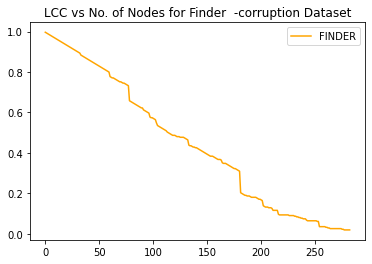

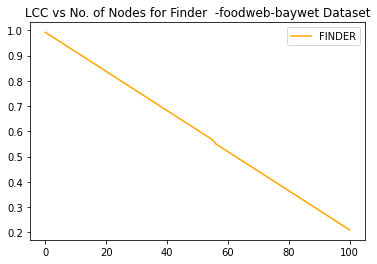

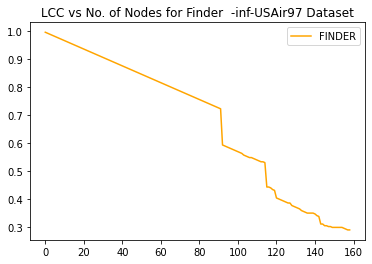

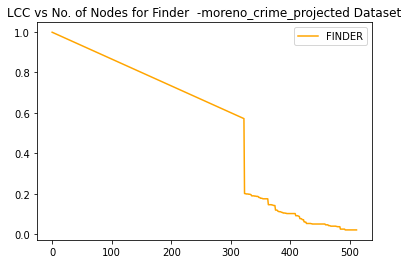

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

file_list = ["corruption","foodweb-baywet","inf-USAir97","moreno_crime_projected"]
path = "/home/bhandk/Desktop/MAS/FINDER/"
for name in file_list:
    GRAPH = nx.read_adjlist("./real/"+name+".txt")
    GRAPH = nx.convert_node_labels_to_integers(GRAPH)
    fname = path+name+".txt"
    initial_lcc = len(max(nx.connected_components(GRAPH), key=len))
    lcc = []
    action_list = np.loadtxt(fname, dtype=int)
    for action in action_list:  
        GRAPH.remove_node(action)
        largest_cc = (len(max(nx.connected_components(GRAPH), key=len))/initial_lcc)
        lcc.append(largest_cc)
    plt.plot(lcc, 'orange', label='FINDER')
    plt.legend()
    plt.title("LCC vs No. of Nodes for Finder  -"+ name +" Dataset")
    plt.show()

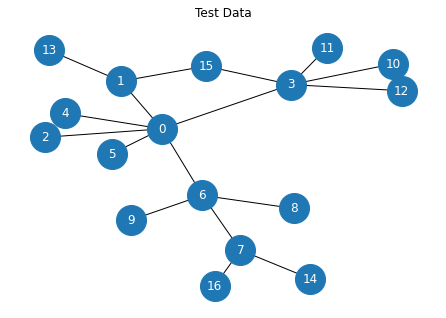

In [5]:
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(0, 3)
G.add_edge(0, 4)
G.add_edge(0, 5)
G.add_edge(0, 6)
G.add_edge(1, 13)
G.add_edge(1, 15)
G.add_edge(3, 10)
G.add_edge(3, 11)
G.add_edge(3, 12)
G.add_edge(3, 15)
G.add_edge(6, 7)
G.add_edge(6, 8)
G.add_edge(6, 8)
G.add_edge(6, 9)
G.add_edge(7, 16)
G.add_edge(7, 14)
nx.draw(G,nodelist=G.nodes, font_color='white' ,node_size = 900, with_labels=True)
nx.write_edgelist(G, '/home/bhandk/Desktop/MAS/real/test.txt')
plt.title("Test Data")
plt.savefig("test")

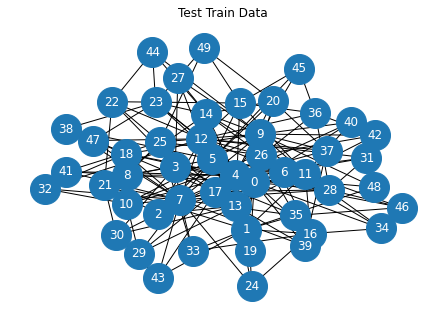

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.barabasi_albert_graph(n=50, m=4)
nx.draw(G,nodelist=G.nodes, font_color='white' ,node_size = 900, with_labels=True)
nx.write_edgelist(G, '/home/bhandk/Desktop/MAS/real/testTrain.txt')
plt.title("Test Train Data")
plt.savefig("testTrain")

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
fh = open("real/testTrain.txt", "rb")
GRAPH = nx.read_edgelist(fh)
fh.close()
nodes = GRAPH.nodes()
map = {n:int(n) for n in nodes}
GRAPH = nx.relabel_nodes(GRAPH, map)
#print(GRAPH.degree())
plt.figure(figsize=(20, 20), dpi=120)
nx.draw(GRAPH,nodelist=GRAPH.nodes, font_color='white' ,node_size = 900, with_labels=True)
#plt.savefig("/home/bhandk/testTrain")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'real/testTrain.txt'

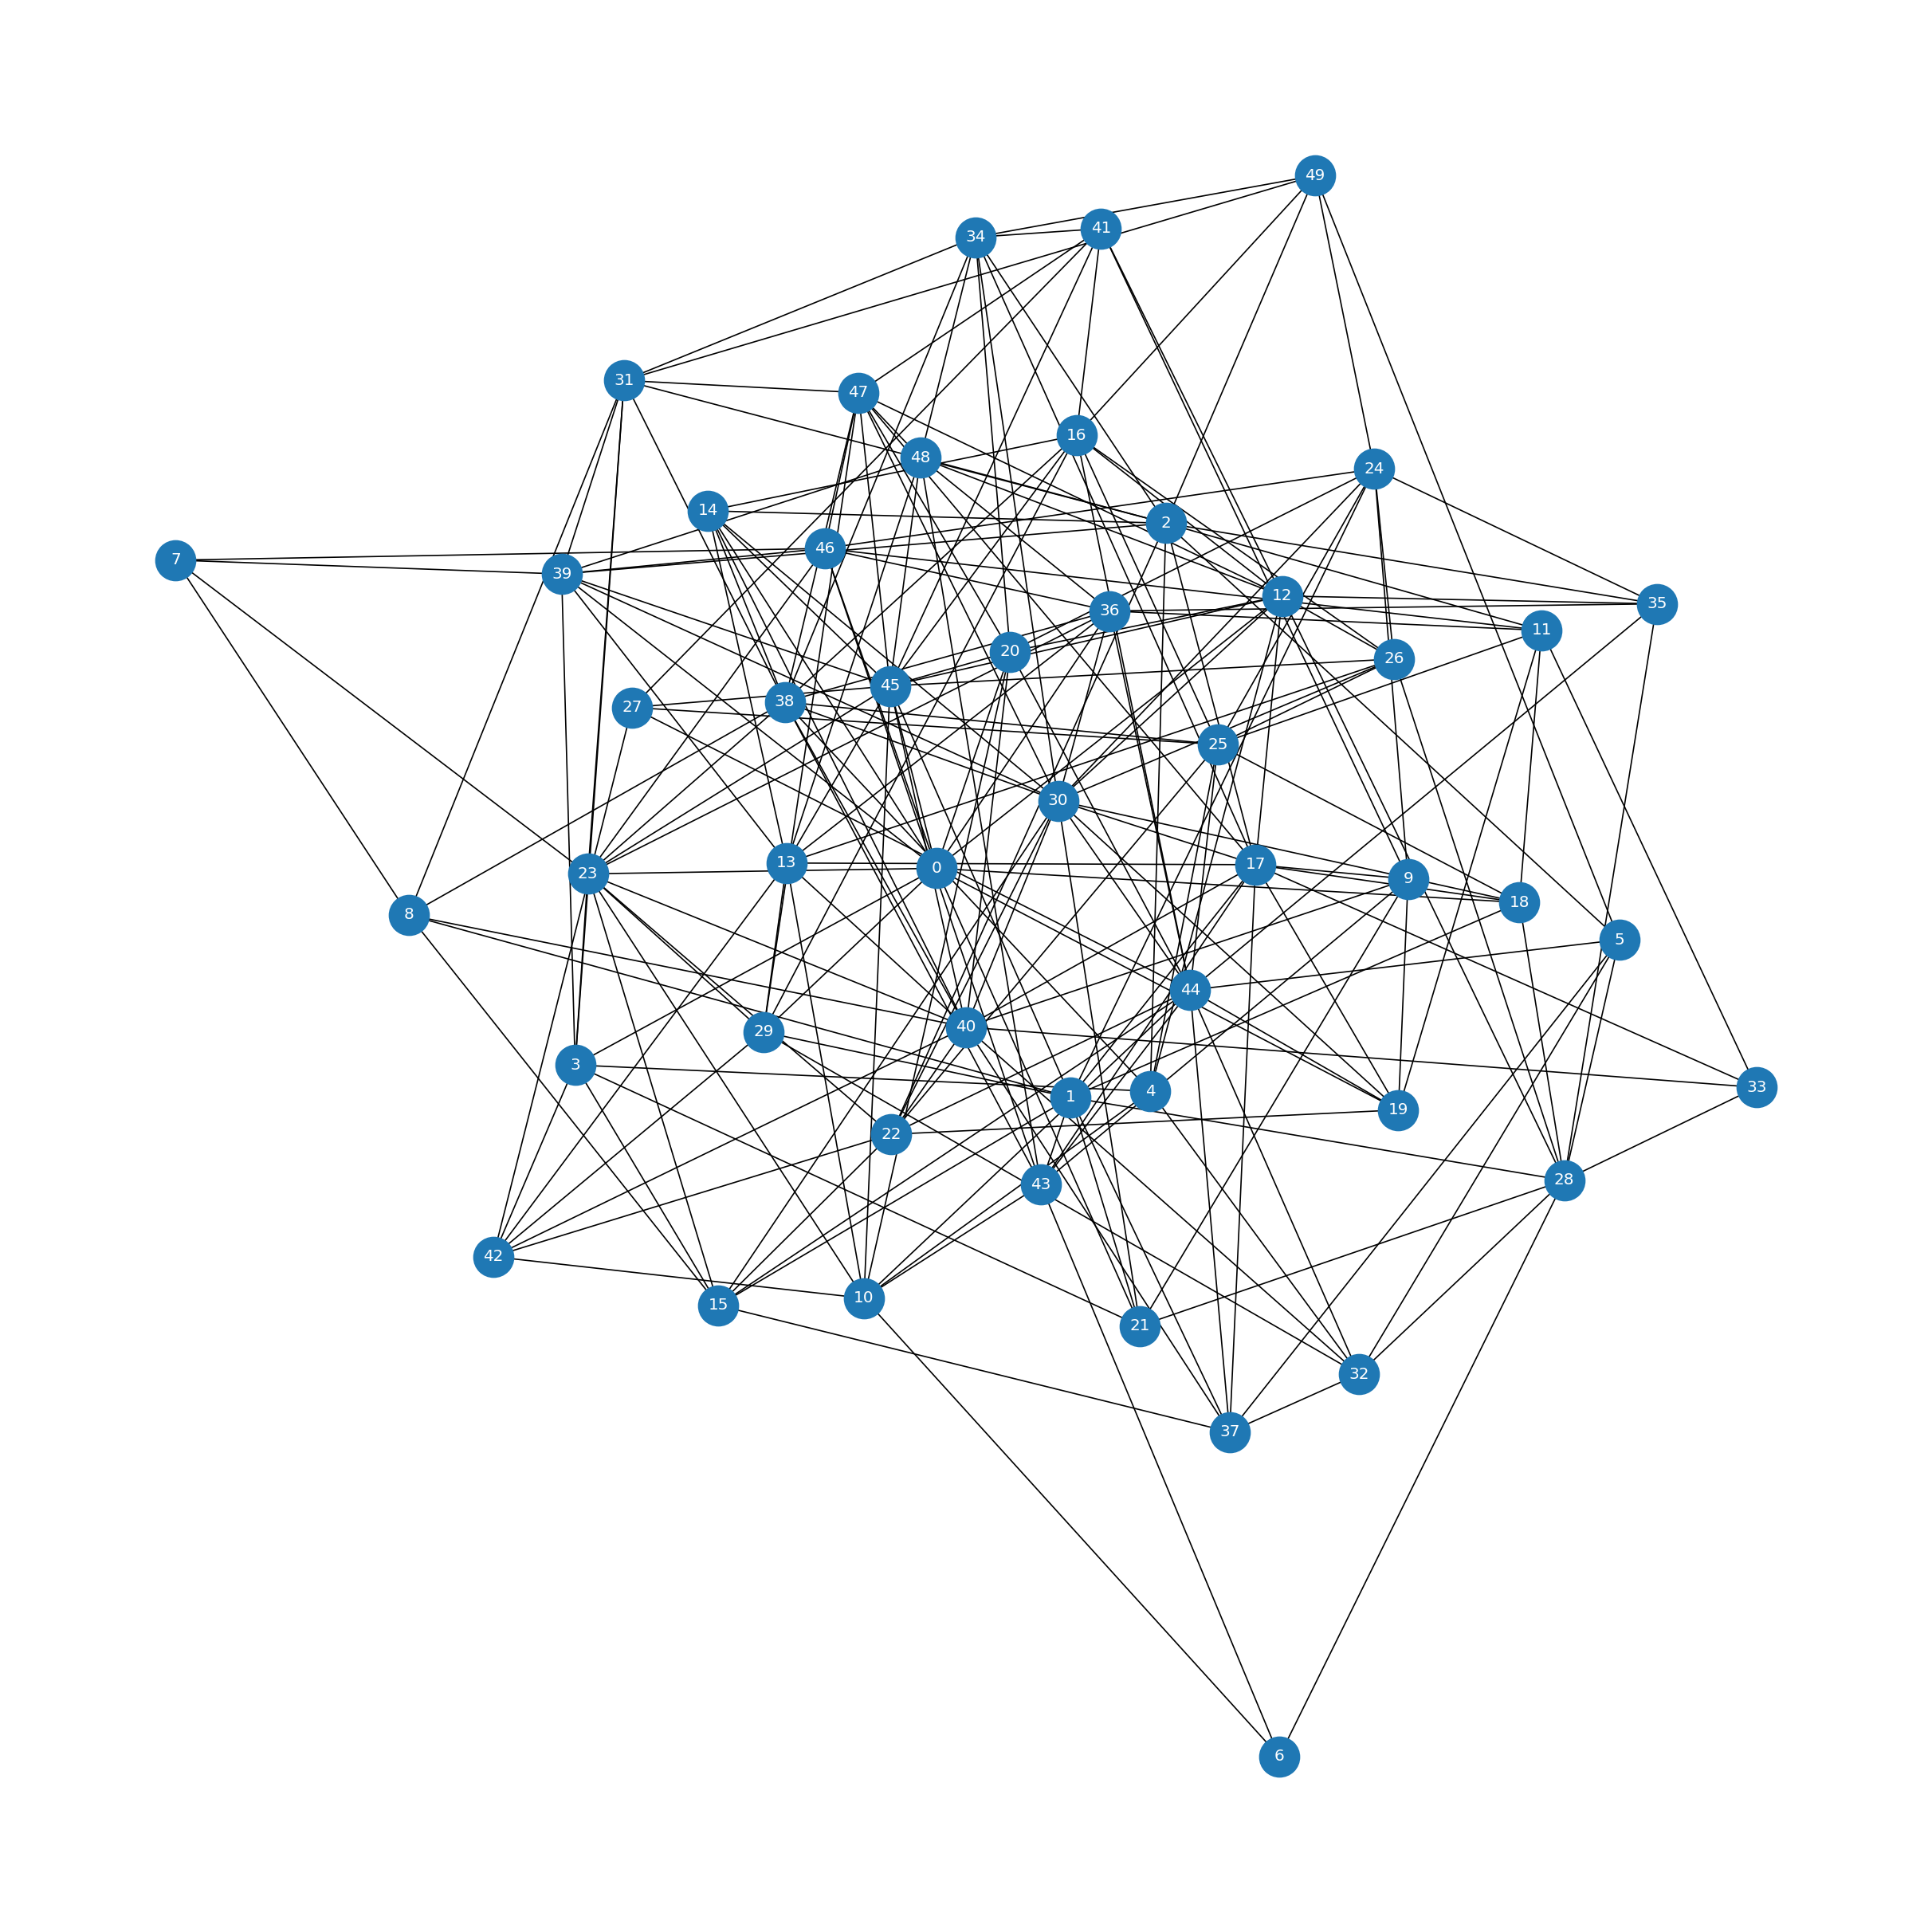

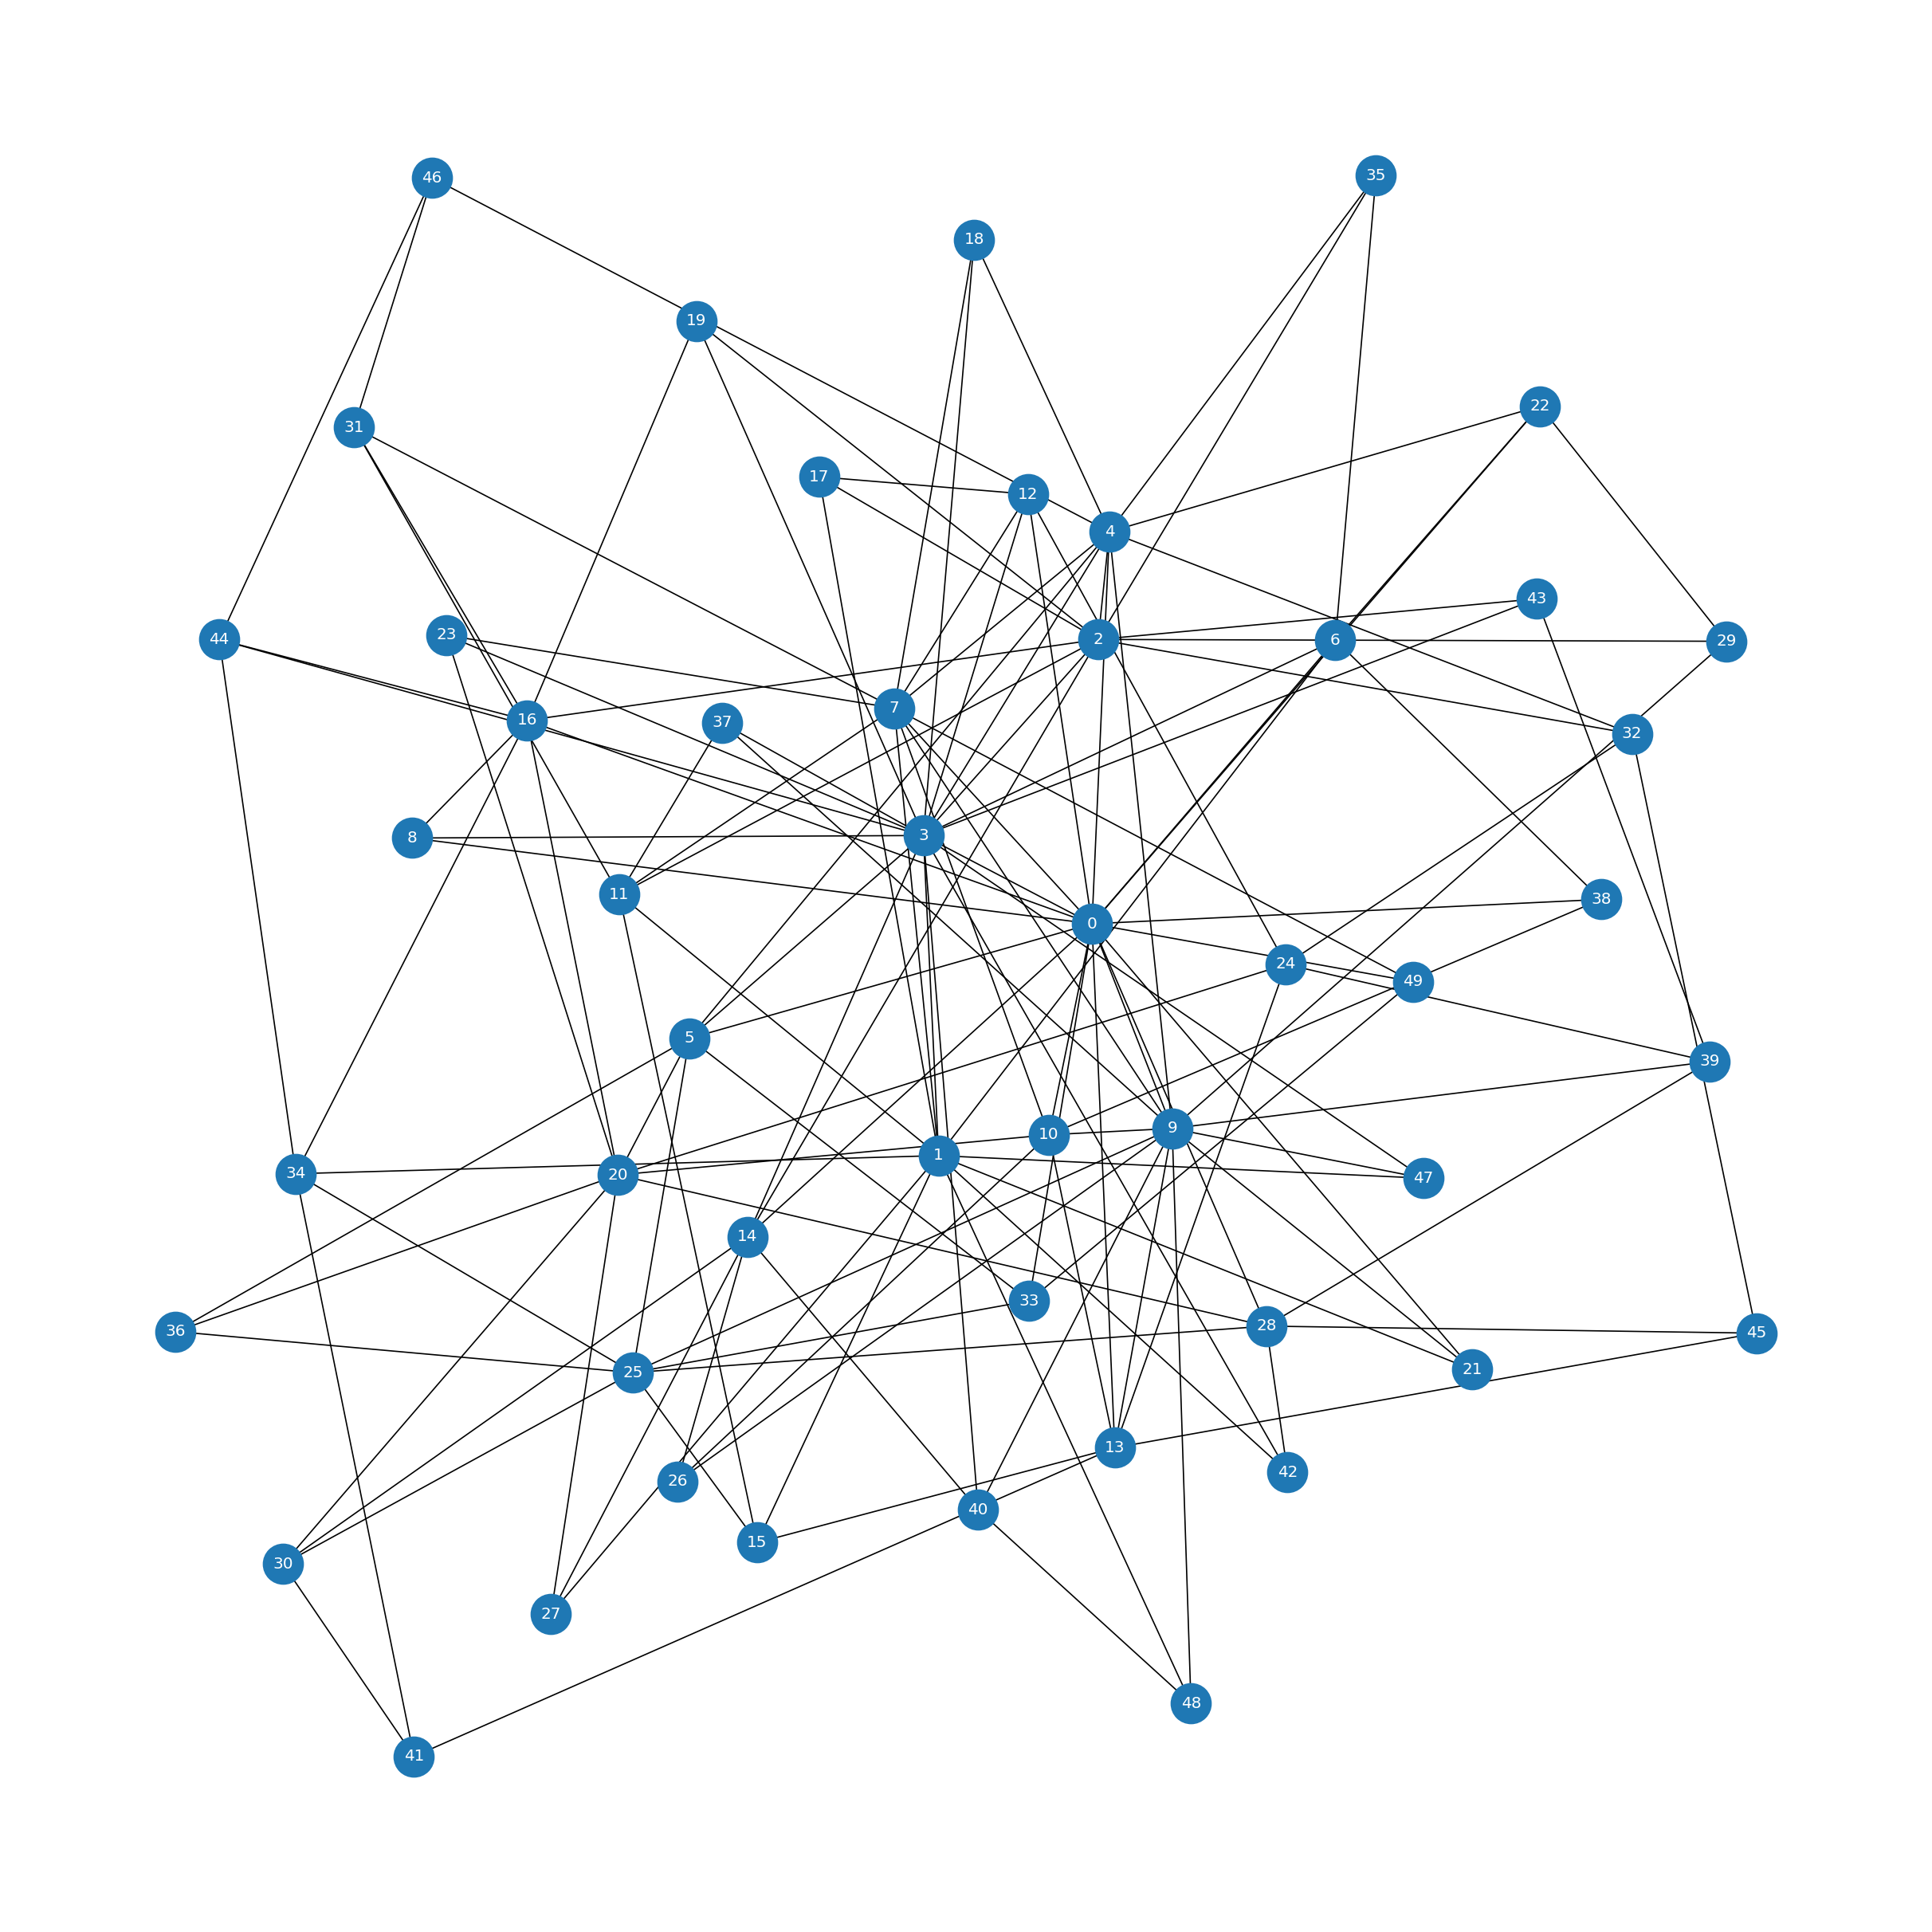

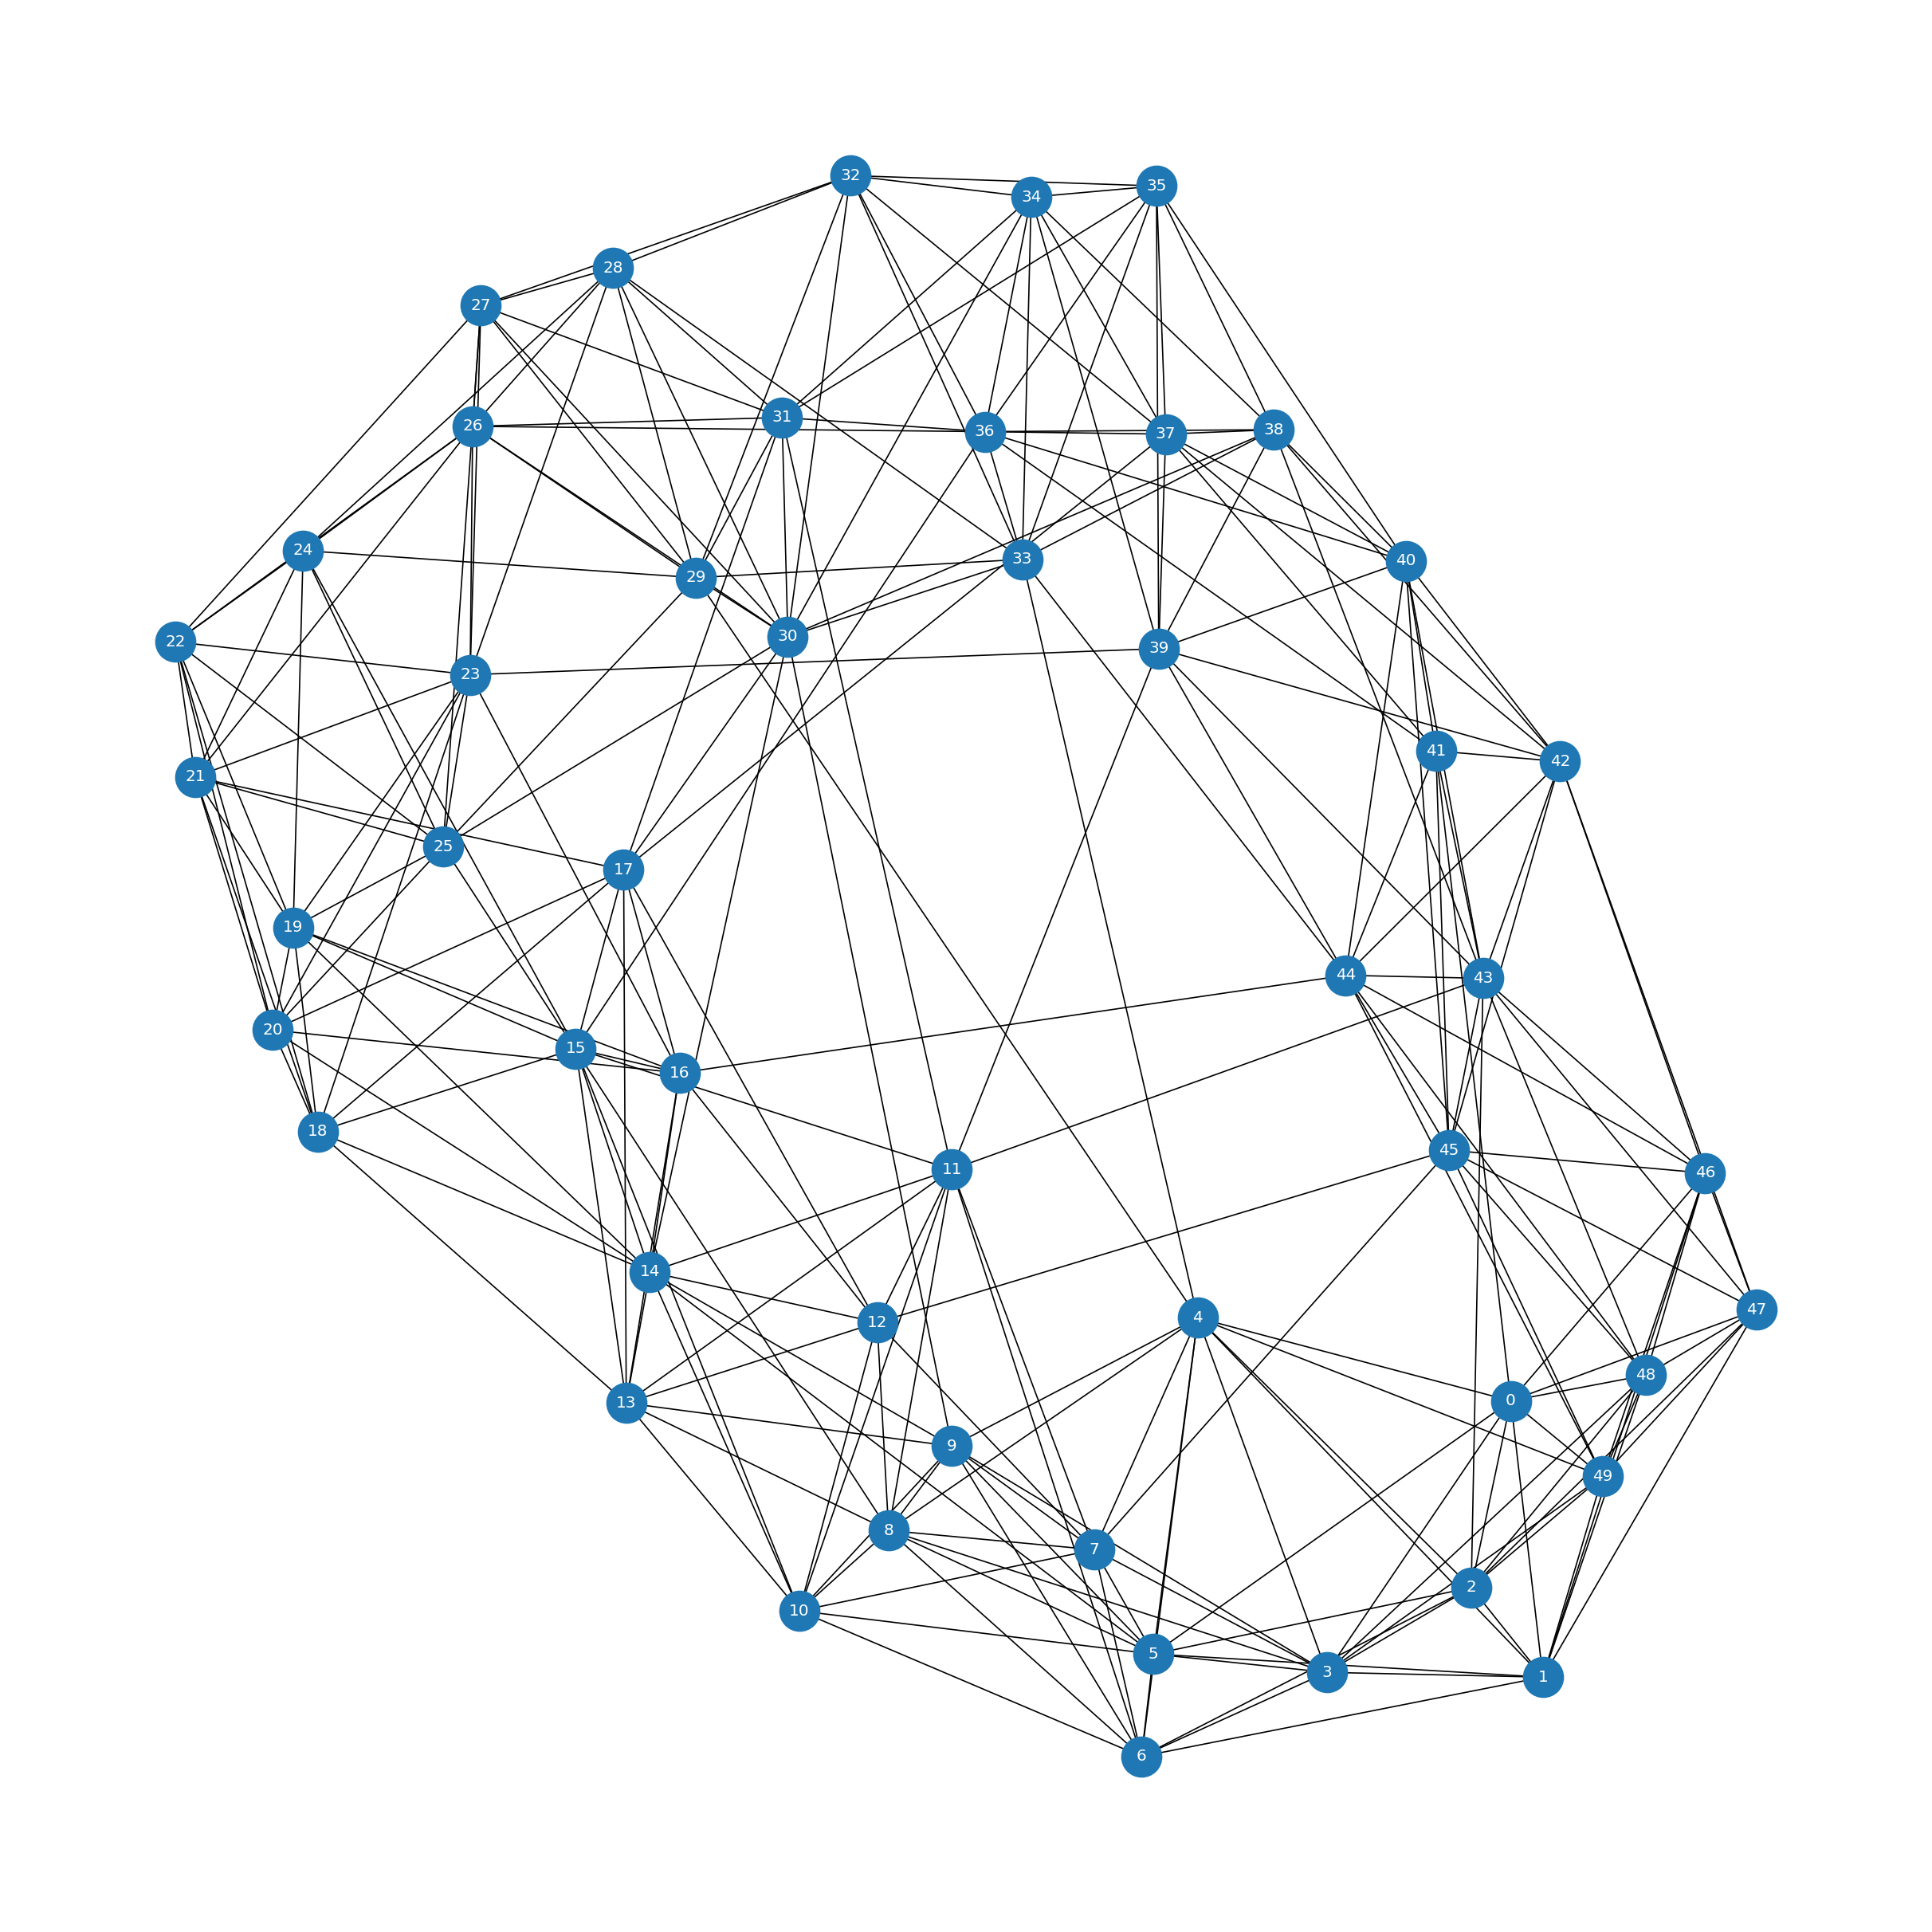

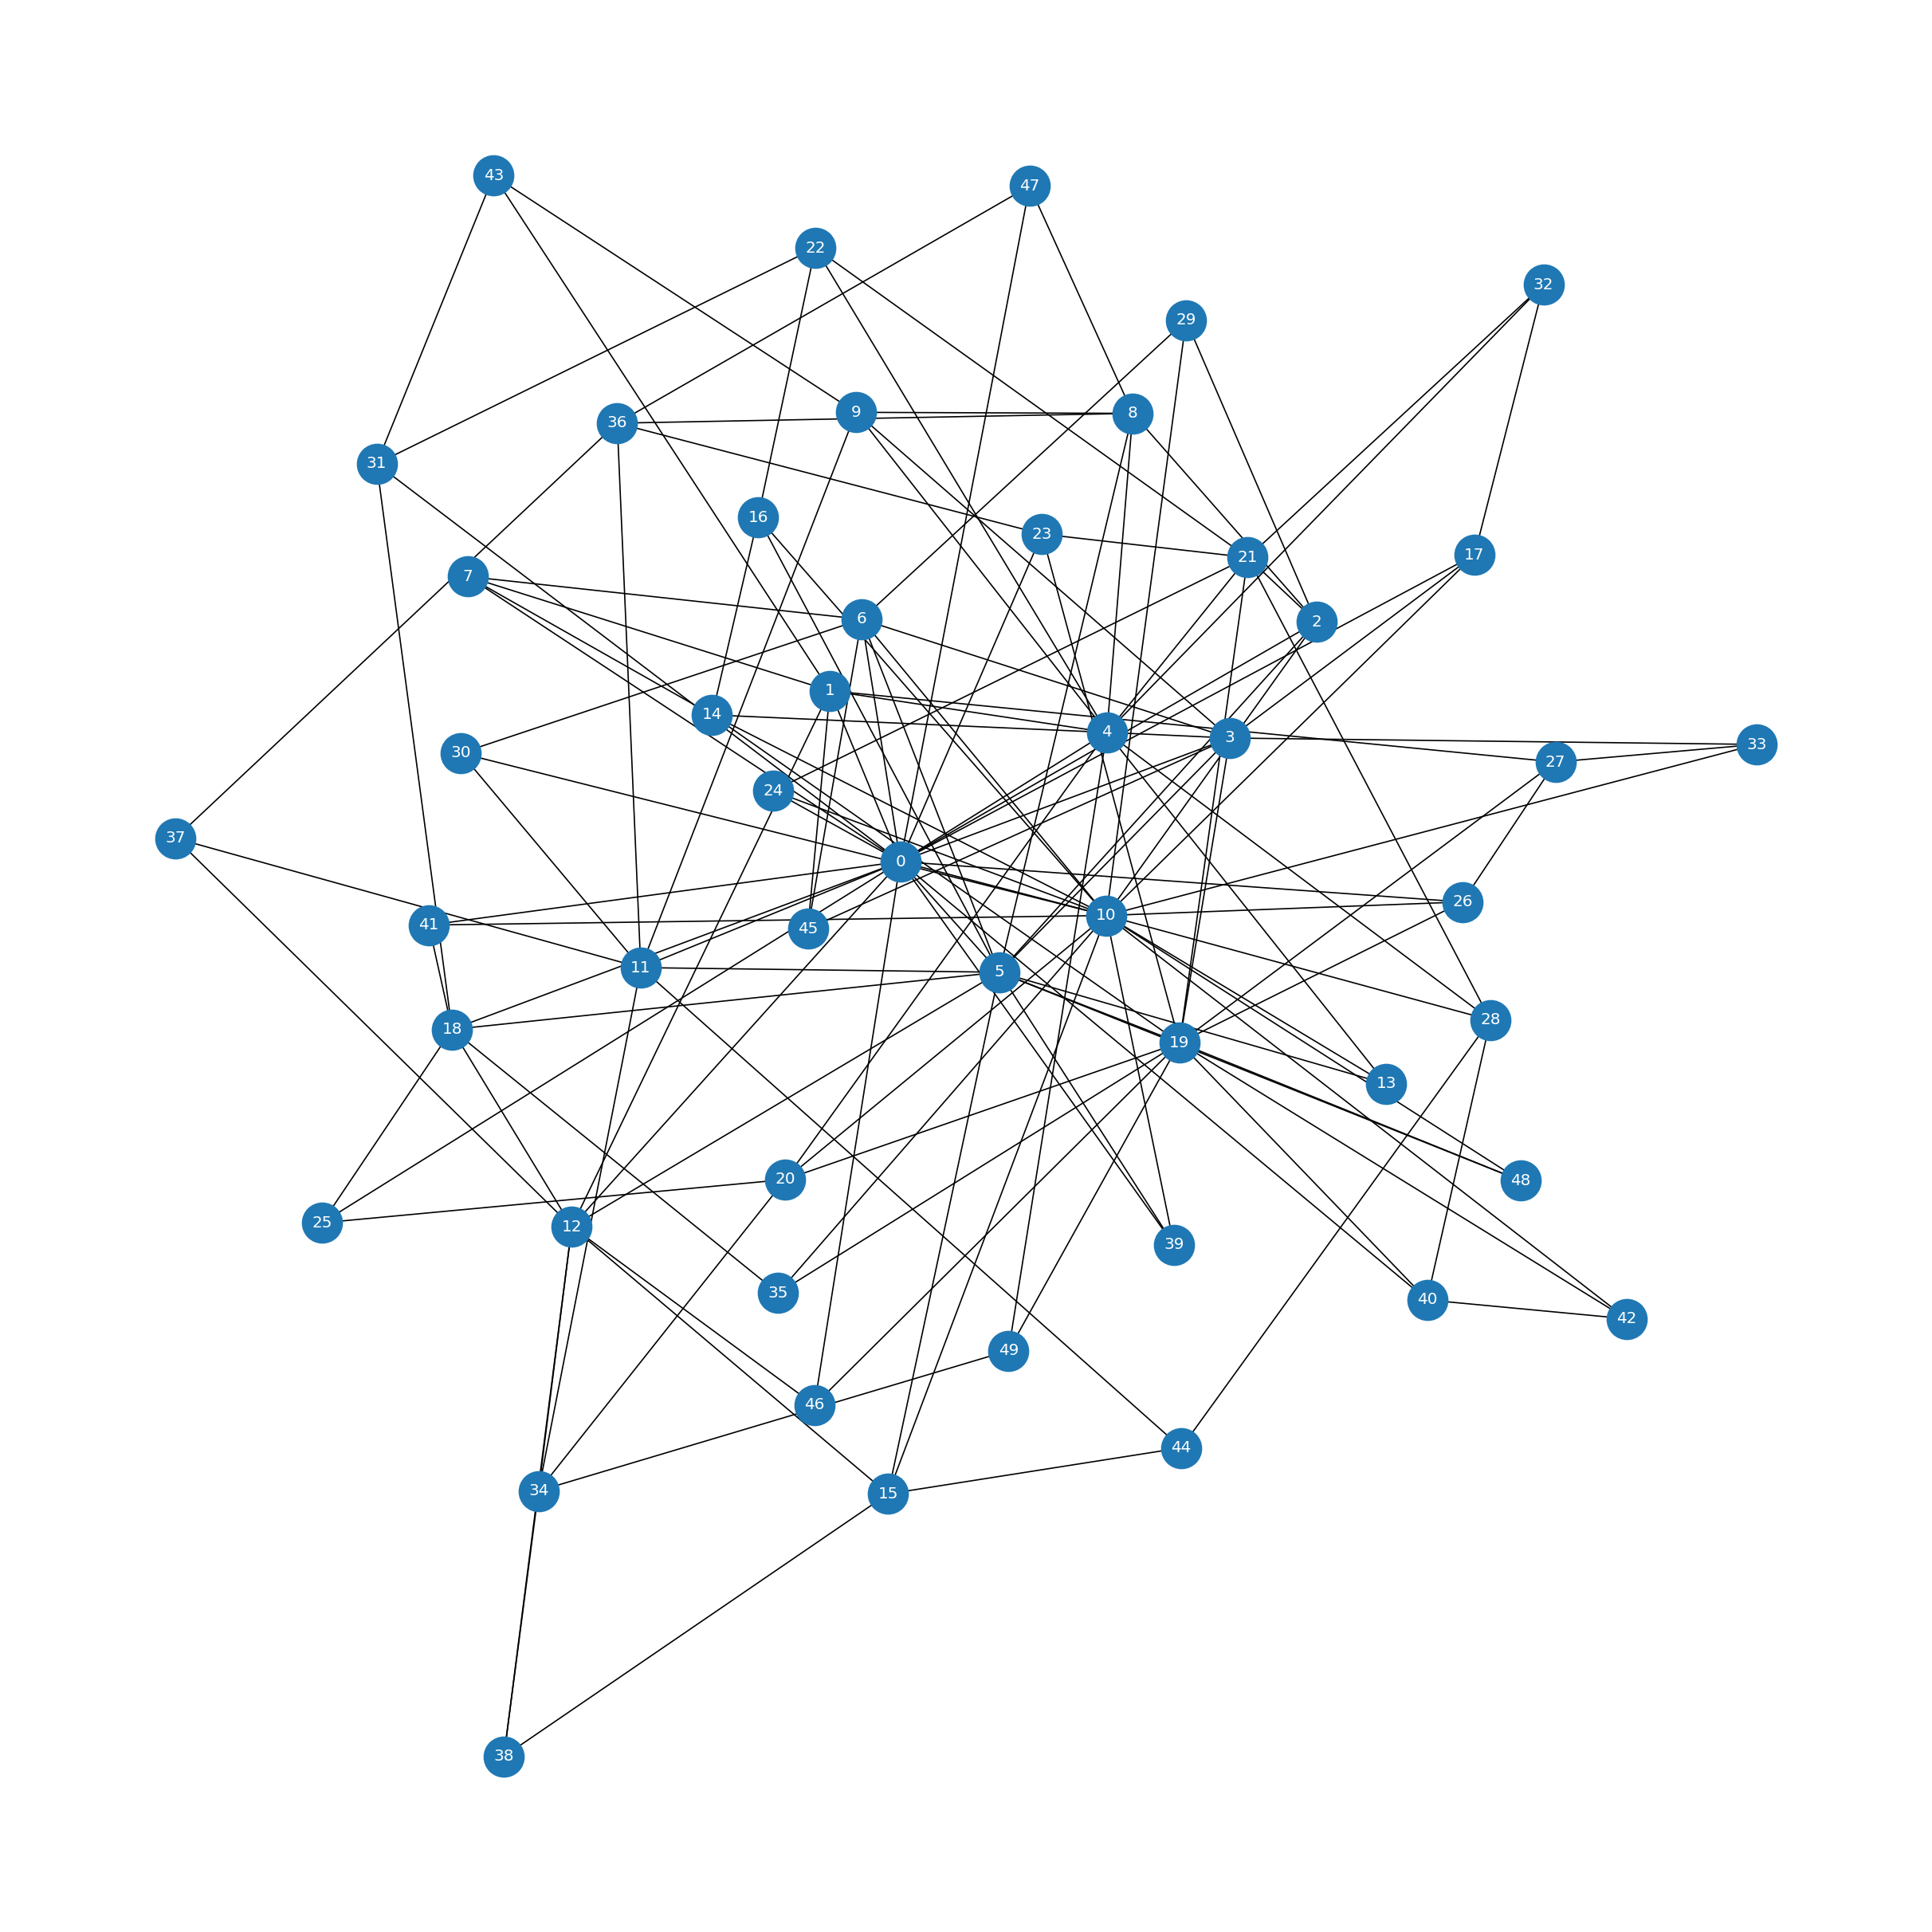

In [2]:
import random
import networkx as nx
def gen_graph(cur_n, g_type):
    if g_type == 'erdos_renyi':
        g = nx.erdos_renyi_graph(n=cur_n, p=random.uniform(0.05,0.25))
    elif g_type == 'powerlaw':
        g = nx.powerlaw_cluster_graph(n=cur_n, m=random.randint(2,4), p=random.uniform(0.01,0.1))
    elif g_type == 'small-world':
        g = nx.connected_watts_strogatz_graph(n=cur_n, k=random.randint(5,10), p=random.uniform(0.01,0.2))
    elif g_type == 'barabasi_albert':
        g = nx.barabasi_albert_graph(n=cur_n, m=random.randint(3,5))
    return g

graph_type = ['erdos_renyi', 'powerlaw','small-world', 'barabasi_albert']
for g_tp in graph_type:
    g = gen_graph(50,g_tp)
    plt.figure(figsize=(15, 20), dpi=120)
    nx.draw(g,nodelist=g.nodes, font_color='white' ,node_size = 900, with_labels=True)
    #plt.savefig("/home/bhandk/testTrain")
    plt.show()

In [7]:
import imageio
filenames=['/home/bhandk/Desktop/MAS/figure/0/'+str(i)+'.png' for i in range(18)]
title = "demo"+'.gif'
with imageio.get_writer(title, mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
def gen_graph(cur_n, g_type):
    if g_type == 'erdos_renyi':
        g = nx.erdos_renyi_graph(n=cur_n, p=0.1)
    elif g_type == 'powerlaw':
        g = nx.powerlaw_cluster_graph(n=cur_n, m=3, p=0.05)
    elif g_type == 'small-world':
        g = nx.connected_watts_strogatz_graph(n=cur_n, k=5, p=0.1)
    elif g_type == 'barabasi_albert':
        g = nx.barabasi_albert_graph(n=cur_n, m=2)
    return g
number = 1 
graph_type = ['erdos_renyi', 'powerlaw','small-world', 'barabasi_albert']
noderange = [30, 50, 100, 500]
for graphtype in graph_type:
    for nodesize in noderange:
        G = gen_graph(nodesize, graphtype)
        filename = graphtype+'_'+str(nodesize)+'_'+str(number)
        #plt.figure(figsize=(15, 20), dpi=120)
        #nx.draw(G,nodelist=G.nodes, font_color='white' ,node_size = 900, with_labels=True)
        #plt.savefig('/home/bhandk/Desktop/MAS/SyntheticGraph/Synthetic_Figure/'+filename)
        nx.write_edgelist(G, '/home/bhandk/Desktop/MAS/SyntheticGraph/'+filename+'.txt')

In [21]:
import numpy as np
x =  np.arange(50)[50:0:-1]/50
print(x[:20])

[0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74 0.72
 0.7  0.68 0.66 0.64 0.62 0.6 ]


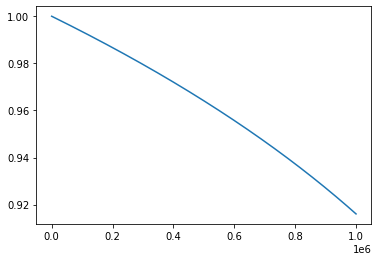

In [13]:
import matplotlib.pyplot as plt

def _get_epsilon(_epsilon_start, _epsilon_end,_step_counter, _epsilon_decay_duration,power):
    decay_steps = min(_step_counter, _epsilon_decay_duration)
    decayed_epsilon = (
        _epsilon_end + (_epsilon_start - _epsilon_end) *
        (1 - decay_steps /_epsilon_decay_duration)**power)
    return decayed_epsilon
ep = []
for _step_counter in range(int(1e6)):
    _epsilon_start, _epsilon_end, _epsilon_decay_duration,power= 1.0,0.15,int(2e6),0.15
    ep.append(_get_epsilon(_epsilon_start, _epsilon_end,_step_counter, _epsilon_decay_duration,power))
plt.plot(ep)
plt.show()